# TP 1 semaine 50

## Partie 2 : Représentation des polynômes et algorithmes d'évaluation d'un polynome
___


### **1. Représentation des polynômes avec Python**

On rappelle la forme générale d'un polynôme de degré $n$ : 
$$ P(x)=a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 +a_1 x + a_0 $$
où les réels $a_0,a_1,\cdots,a_n$ sont les **coefficients** du polynômes et $a_n \neq 0$

**Avec Python, Le type Polynome n’existe pas. On choisira de définir un polynôme par un objet de type *list* contenant ses coefficients :**  

```> [a0,a1,...,an]```

Attention à l'ordre des coefficients dans cette liste : 
- L'élément d'index $0$ de la liste sera le coefficient $a_0$. 
- L'élément d'index $1$ de la liste sera le coefficient $a_1$.
- ...
- L'élément d'index $n$ de la liste sera le coefficient $a_n$.


**Question 1**  : 

Construire la liste P correspondant au polynôme  : $ P(x)=x^5 -x^4+2x^3+3x-4$

In [2]:
# réponse 
P=[-4,3,0,2,-1,1]

**Question 2**  : 

Quel est le polynôme qui correspond à la liste : `P=[0,3,-1,0,2]` ?  

Réponse : a0=1, a1=3, a2=-1, a3=0, a4=2
P(x) = 3x - x^2 +2x^4  = 2x^4 - x^2 + 3x 

**Question 3** :

Par quelle commande recupérer le degré du polynôme à partir de la liste P de ses coefficients ?

In [3]:
# réponse
n=len(P)-1

### **2. Evaluation d'un polynôme en une valeur de x**
*Problème :*
Soit $P(x)=a_nx^n+ \cdots + a_2x^2+a_1 x + a_0$ un polynôme de degré $n$.

L'objectif est de comparer plusieurs algorithmes de calcul du nombre $P(x)$ pour une valeur de $x$ donnée.

**Question 4** :

A partir du travail réalisé en TD, écrire les trois fonctions : 
- `Evaluer1()`
- `Evaluer2()` 
- `Evaluer3()`

correspondant aux trois versions de l'algorithme "classique" qui consiste à calculer, de façon itérative, la somme 
$$ P(x)=a_n x^n+ \cdots + a_2x^2+a_1 x + a_0 $$ 

Les entrées des fonctions seront : 
- la liste P des coefficients du polynôme
- la valeur x

Vous testerez vos fonctions pour l'évaluation du polyôme $P(x)=x^5 -x^4+2x^3+3x-4$ (cf question 1) en $x=9$.

Le résultat attendu est  $P(9)=53969 $.

In [4]:
# définition de la fonction 
# version 1 : avec utilisation de l'opérateur "double étoile" de Python pour les puissances x^i : 
def Evaluer1 (P,x) :
    n=len(P)-1   # degre de P
    Res=P[0]
    for i in range(1,n+1): # n itérations de 1 à n
        Res = Res + P[i] * x**i
    return Res  

In [5]:
# test de la fonction
x=9
Evaluer1(P,x)

53969

In [6]:
# définition de la fonction 
# version 2 : en construisant à chaque itération la puissance i de x par : x^i = x*x*x*...*x
def Evaluer2 (P,x) :
    n=len(P)-1   # degre de P
    Res=P[0]
    for i in range(1,n+1): # n itérations de 1 à n
        # calcul de x puissance i
        Puiss = 1
        for j in range(i): # i itérations
            Puiss=Puiss*x
        Res=Res+P[i]*Puiss
    return Res  

def Evaluer2bis (P,x) :
    n=len(P)-1   # degre de P
    valeur=0
    for i in range(n+1): # n+1 itérations de 0 à n
        nome = P[i]
        for j in range(i): # i itérations (pour i=0 on n'entre pas)
            nome=nome*x
        valeur=valeur+nome
    return valeur

In [7]:
# test de la fonction
x=9
print(Evaluer2(P,x))
print(Evaluer2bis(P,x))

53969
53969


In [8]:
# définition de la fonction 
# version 3 : en construisant à chaque itération la puisssance i de x par la formule de récurrence : x^i = x^(i-1) * x
def Evaluer3 (P,x) :
    n=len(P)-1   # degre de P
    Res=P[0]
    Puiss = 1
    for i in range(1,n+1): # n itérations i de 1 à n
        Puiss= Puiss * x
        Res=Res+P[i]*Puiss
    return Res

In [9]:
# test de la fonction
print(Evaluer3(P,x))

53969


**Question 5** : Écrire la fonction `Horner()` permettant d'évaluer un polynôme en une valeur par l'algorithme de Horner

Les entrées de la fonction seront : 
- la liste P des coefficients du polynôme
- la valeur x

Vous testerez la fonction pour l'évaluation du polyôme $ P(x)=x^5 -x^4+2x^3+3x-4$ (cf question1) en $x=9$.

Le résultat attendu est  $P(9)=53969 $.

In [10]:
# définition de la fonction 
def horner(P,x):
    n = len(P)-1  # n degré du polynôme
    res = P[-1]
    for i in range(1,n+1):  # n itérations (i=1 à n)
        res = res * x + P[n-i]
    return res    

In [11]:
# test de la fonction
print(horner(P,x))

53969


### **3. Comparaison des algorithmes en fonction de leur complexité**

La fonction `av_time()`suivante retourne les temps d'exécution d'une fonction d'évaluation `func(P,x)` pour des polynômes aléatoires de degré croissant : de 1 à `degreMax`. 

Pour chaque polynôme, l'évaluation sera répété plusieurs fois (`nbEssais`) avec des valeurs de x aléatoires entre 0 et 100. C'est le temps moyen qui sera retourné. 

**Question 6** : comprendre et exécuter les cellules de code suivantes

In [12]:
from random import randint
import time 

def av_time(func,degreMax,nbEssais):
    result=list()   # ou result = []  
    
    somme=0.0

    for j in range(1,degreMax+1):   # j allant de 1 à degreMax
        # on génére un polynôme aléatoire de degré j de coefficients entiers entre 1 et 100
        # en générant une liste aléatoire de j+1 entiers
        P=[randint(1,100) for i in range(j+1)]  
        somme=0.0

        # on réalise nbEssais calculs d'évaluation de P(x) pour des valeurs de x aléatoires
        for k in range(1,nbEssais+1):  # nbEssais itérations
            x=randint(0,100) # génére une valeur de x aléatoire entre 0 et 100
            t=time.perf_counter_ns()  # declenche le compteur
            func(P,x)  # évalue P(x)
            somme+=(time.perf_counter_ns()-t) # cumule les temps d'exécution
 
    return result

In [13]:
degreMax = 10
nbEssais = 1000
ll1=av_time(Evaluer1,degreMax,nbEssais)
ll2=av_time(Evaluer2,degreMax,nbEssais)
ll3=av_time(Evaluer3,degreMax,nbEssais)
ll4=av_time(horner,degreMax,nbEssais)

In [14]:
# Pour la suite, nous allons utiliser le module matplotlib pour tracer les courbes
# Il est necessaire l'installer ce module avec les deux commandes suivantes : 
# vous devrez redémarrer le noyau après chaque commande 
# (menu "Rédémarrer" ou "Restart" dans la barre de menu en haut)

In [15]:
# pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [16]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


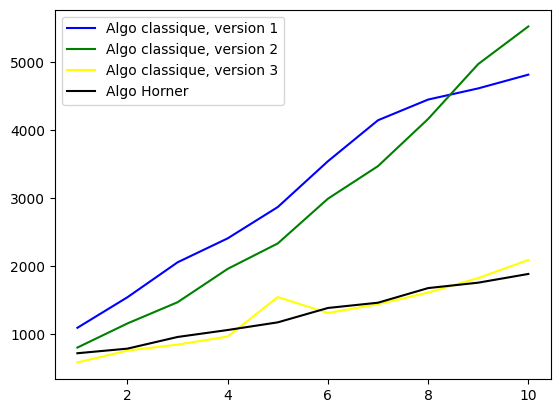

In [17]:
import matplotlib.pyplot as plt

leX=[i for i in range(1,degreMax+1)]   # liste des abscisses (degrés)
leY1=ll1  # liste des ordonnées pour la courbe 1 (temps moyen d'exécution)
leY2=ll2
leY3=ll3
leY4=ll4
plt.plot(leX, leY1,label='Algo classique, version 1',color='blue')  # Evaluer1
plt.plot(leX, leY2,label='Algo classique, version 2',color='green') # Evaluer2
plt.plot(leX, leY3,label='Algo classique, version 3',color='yellow') # Evaluer3
plt.plot(leX, leY4,label='Algo Horner',color='black') # Horner
plt.legend()
plt.show()

### **4. Autres fonctions sur les polynômes**

**Question 7** : 

On rappelle que la dérivée du monôme $a x^n$ est $n a x^{n-1}$ et que la dérivée de $f(x)+g(x)$ est $f’(x)+g’(x)$.

Dès lors, automatiser le calcul de la dérivée d’un polynôme est une tâche simple.

Ecrire la fonction `derivation(P)`qui, à partir de la liste des coefficients d'un polynôme P, retourne la liste de coefficients du polynôme dérivé P'. 

In [18]:
def derivation(P):
    D=[] 
    n=len(P)-1
    for i in range(1,n+1):
        D.append(i * P[i])
    return D

In [19]:
# test de la fonction avec le polynôme P de la question 1
# résultat attendu : derivation(P)=[3,0,6,-4,5]

# Si P(x)=x^5 -x^4+2x^3+3x-4, alors P'(x)=5x^4 - 4x^3 + 6x^2 + 3
# Si P(x):

P=[-4,3,0,2,-1,1]
derivation(P)

[3, 0, 6, -4, 5]

**Question 8** : 

Ecrire la fonction `addition(P,Q)` qui, à partir des listes des coefficients de deux polynômes P et Q quelconques, retourne la liste de coefficients du polynôme somme P+Q. 

In [2]:
def addition(P,Q):
    # on crée un polynôme nul qui a la bonne longueur
    if len(P)>len(Q): 
        Somme = [0]*len(P) ## C’est-à-dire soit celle de P
    else: 
        Somme = [0]*len(Q) ## soit celle de Q

     # On ajoute les coefficients
    for i in range(len(P)): 
        Somme[i] += P[i] # d’abord ceux de P
    for i in range(len(Q)):
        Somme[i]+= Q[i] # puis ceux de Q
        
    # On termine en renvoyant le polynôme
    return Somme


In [5]:
# test de la fonction dans les deux cas : 
# Cas 1 : deux polynômes de degrés différents
P=[1,1,1,1]
Q=[2,1]
print(addition(P,Q))

# Cas 2 : deux polynômes de même degrés
P=[1,1,1]
Q=[1,1,2]
print(addition(P,Q))

[3, 2, 1, 1]
[2, 2, 3]
